<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#&quot;Глубокое-обучение&quot;.-Продвинутый-поток" data-toc-modified-id="&quot;Глубокое-обучение&quot;.-Продвинутый-поток-0.0.1"><b>"Глубокое обучение". Продвинутый поток</b></a></span></li></ul></li><li><span><a href="#Семинар-6.-Основы-библиотеки-PyTorch-" data-toc-modified-id="Семинар-6.-Основы-библиотеки-PyTorch--0.1"><b>Семинар 6. Основы библиотеки PyTorch </b></a></span><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-0.1.1"><b>Введение</b></a></span></li><li><span><a href="#Установка" data-toc-modified-id="Установка-0.1.2"><b>Установка</b></a></span></li></ul></li><li><span><a href="#Синтаксис-Фреймворка" data-toc-modified-id="Синтаксис-Фреймворка-0.2">Синтаксис Фреймворка</a></span><ul class="toc-item"><li><span><a href="#Типы-Тензоров" data-toc-modified-id="Типы-Тензоров-0.2.1">Типы Тензоров</a></span></li><li><span><a href="#Создание-тензора" data-toc-modified-id="Создание-тензора-0.2.2">Создание тензора</a></span></li><li><span><a href="#Инициализации-тензоров" data-toc-modified-id="Инициализации-тензоров-0.2.3">Инициализации тензоров</a></span></li></ul></li><li><span><a href="#Функции-в-Torch" data-toc-modified-id="Функции-в-Torch-0.3">Функции в Torch</a></span><ul class="toc-item"><li><span><a href="#Изменение-формы" data-toc-modified-id="Изменение-формы-0.3.1">Изменение формы</a></span></li><li><span><a href="#Изменение-типа-тензора" data-toc-modified-id="Изменение-типа-тензора-0.3.2">Изменение типа тензора</a></span></li><li><span><a href="#Арифметические-операции" data-toc-modified-id="Арифметические-операции-0.3.3">Арифметические операции</a></span><ul class="toc-item"><li><span><a href="#Сложение" data-toc-modified-id="Сложение-0.3.3.1">Сложение</a></span></li><li><span><a href="#Вычитание" data-toc-modified-id="Вычитание-0.3.3.2">Вычитание</a></span></li><li><span><a href="#Умножение-(поэлементное)" data-toc-modified-id="Умножение-(поэлементное)-0.3.3.3">Умножение (поэлементное)</a></span></li><li><span><a href="#Деление-(поэлементное):" data-toc-modified-id="Деление-(поэлементное):-0.3.3.4">Деление (поэлементное):</a></span></li></ul></li><li><span><a href="#Операторы-сравнения" data-toc-modified-id="Операторы-сравнения-0.3.4">Операторы сравнения</a></span></li><li><span><a href="#Использование-индексации-по-логической-маске" data-toc-modified-id="Использование-индексации-по-логической-маске-0.3.5">Использование индексации по логической маске</a></span></li><li><span><a href="#Поэлементное-применение-универсальных-функций" data-toc-modified-id="Поэлементное-применение-универсальных-функций-0.3.6">Поэлементное применение <strong>универсальных функций</strong></a></span></li><li><span><a href="#Агрегация-и-работа-с-осями" data-toc-modified-id="Агрегация-и-работа-с-осями-0.3.7">Агрегация и работа с осями</a></span><ul class="toc-item"><li><span><a href="#sum,-mean,-max,-min:" data-toc-modified-id="sum,-mean,-max,-min:-0.3.7.1">sum, mean, max, min:</a></span></li><li><span><a href="#Применение-функции-вдоль-оси" data-toc-modified-id="Применение-функции-вдоль-оси-0.3.7.2">Применение функции вдоль оси</a></span></li><li><span><a href="#Фиктивные-оси" data-toc-modified-id="Фиктивные-оси-0.3.7.3">Фиктивные оси</a></span></li><li><span><a href="#Безобидная-задача-на-кумулятивные-суммы" data-toc-modified-id="Безобидная-задача-на-кумулятивные-суммы-0.3.7.4">Безобидная задача на кумулятивные суммы</a></span></li><li><span><a href="#Задача-на-нормализацию-изображения" data-toc-modified-id="Задача-на-нормализацию-изображения-0.3.7.5">Задача на нормализацию изображения</a></span></li></ul></li></ul></li><li><span><a href="#Матричные-операции" data-toc-modified-id="Матричные-операции-0.4">Матричные операции</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Транспонирование-тензора" data-toc-modified-id="Транспонирование-тензора-0.4.0.1">Транспонирование тензора</a></span></li><li><span><a href="#Скалярное-произведение-векторов" data-toc-modified-id="Скалярное-произведение-векторов-0.4.0.2">Скалярное произведение векторов</a></span></li><li><span><a href="#Матричное-произведение" data-toc-modified-id="Матричное-произведение-0.4.0.3">Матричное произведение</a></span></li></ul></li></ul></li><li><span><a href="#Конвертация" data-toc-modified-id="Конвертация-0.5">Конвертация</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Конвертация-из-Numpy-в-Pytorch:" data-toc-modified-id="Конвертация-из-Numpy-в-Pytorch:-0.5.0.1">Конвертация из Numpy в Pytorch:</a></span></li><li><span><a href="#Конвертация-из-Torch-в-Numpy" data-toc-modified-id="Конвертация-из-Torch-в-Numpy-0.5.0.2">Конвертация из Torch в Numpy</a></span></li><li><span><a href="#Задание.-Реализация-функции-forward" data-toc-modified-id="Задание.-Реализация-функции-forward-0.5.0.3">Задание. Реализация функции forward</a></span></li></ul></li></ul></li><li><span><a href="#" data-toc-modified-id="-0.6"></a></span></li></ul></li><li><span><a href="#CUDA" data-toc-modified-id="CUDA-1"><a href="https://ru.wikipedia.org/wiki/CUDA" rel="nofollow" target="_blank">CUDA</a></a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Кладём-тензор-на-GPU" data-toc-modified-id="Кладём-тензор-на-GPU-1.0.0.1">Кладём тензор на GPU</a></span></li></ul></li><li><span><a href="#Пример-работы-на-GPU" data-toc-modified-id="Пример-работы-на-GPU-1.0.1">Пример работы на GPU</a></span></li></ul></li><li><span><a href="#AutoGrad" data-toc-modified-id="AutoGrad-1.1">AutoGrad</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Задание.-Реализуйте-обучение-в-логистической-регрессии" data-toc-modified-id="Задание.-Реализуйте-обучение-в-логистической-регрессии-1.1.0.1">Задание. Реализуйте обучение в логистической регрессии</a></span></li></ul></li></ul></li><li><span><a href="#Дополнительные-материалы" data-toc-modified-id="Дополнительные-материалы-1.2">Дополнительные материалы</a></span></li></ul></li></ul></div>

<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=550 height=450/></p>

<h3 style="text-align: center;"><b>"Глубокое обучение". Продвинутый поток</b></h3>

<h2 style="text-align: center;"><b>Семинар 6. Основы библиотеки PyTorch </b></h2>


<p style="align: center;"><img src="https://upload.wikimedia.org/wikipedia/commons/9/96/Pytorch_logo.png" width=400 height=100></p>

Этот ноутбук посвящён основам  библиотеки PyTorch.

<h3 style="text-align: center;"><b>Введение</b></h3>

В настоящее время существует множество фреймворков глубокого обучения. Разница между ними заключается во внутренних принципах вычислений. Например, в **[Caffe](http://caffe.berkeleyvision.org/)** и **[Caffe2](https://caffe2.ai/)** вы пишете код, используя некоторые «готовые блоки» "(как и $ LEGO ^ {TM} $ :). В **[TensorFlow](https://www.tensorflow.org/)** и **[Theano](http://deeplearning.net/software/theano/)** вы сначала объявляете граф вычислений, затем компилируйте его и используйте для вывода / обучения (`tf.session ()`). Кстати, теперь в TensorFlow (начиная с версии 1.10) есть функция [Eager Execution](https://www.tensorflow.org/guide/eager), которая может быть полезна для быстрого прототипирования и отладки. **[Keras](https://keras.io/)** - очень популярный и полезный фреймворк DL, который позволяет быстро реализовывать нейронный сети и имеет множество полезных функций.


<p style="align: center;"><img src="https://habrastorage.org/web/e3e/c3e/b78/e3ec3eb78d714a7993a6b922911c0866.png" width=500 height=500></p>  
<p style="text-align: center;"><i>Image credit: https://habr.com/post/334380/</i><p>

Мы будем использовать **PyTorch**, поскольку он активно развивается и поддерживается AI-сообществом

<h3 style="text-align: center;"><b>Установка</b></h3>

Подробную инструкцию по установке PyTorch вы можете найти на [официальном сайте PyTorch](https://pytorch.org/).

## Синтаксис Фреймворка

In [1]:
import torch

Несколько фактов о PyTorch:
- динамический граф вычислений
- удобные модули `torch.nn` и `torchvision` для быстрого прототипирования нейронных сетей
- даже быстрее, чем TensorFlow на некоторых задачах
- позволяет легко использовать **GPU**

По своей сути PyTorch предоставляет две основные функции:

- n-мерный тензор, похожий на **numpy**, но может работать на графических процессорах
- Автоматическая дифференциация для построения и обучения нейронных сетей

Если бы PyTorch был формулой, она была бы такой:

$$PyTorch = NumPy + CUDA + Autograd$$

(CUDA - [wiki](https://en.wikipedia.org/wiki/CUDA))

Давайте посмотрим, как мы можем использовать PyTorch для работы с векторами и тензорами.

Напомним, что **тензор** - это многомерный вектор, например :

`x = np.array ([1,2,3])` - вектор = тензор с 1 размерностью (точнее: `(3,)`)

`y = np.array ([[1, 2, 3], [4, 5, 6]])` - матрица = тензор с двумя измерениями (`(2, 3)` в данном случае)

`z = np.array ([[[1, 2, 3], [4, 5, 6], [7, 8, 9]]],
               [[1, 2, 3], [4, 5, 6], [7, 8, 9]],
               [[1, 2, 3], [4, 5, 6], [7, 8, 9]]]) `-" куб "(3, 3, 3) = тензор с тремя измерениями (` ( 3, 3, 3) `в этом случае)


Одним из реальных примеров трехмерного тензора является **изображение**, оно имеет 3 измерения: `высота`, `ширина` и `глубина канала` (глубина канала = 3 для цветных изображений, 1 для оттенков серого). Вы можете думать об этом как о параллелепипеде, состоящем из действительных чисел.


### Типы Тензоров

В PyTorch мы будем использовать `torch.Tensor` (`FloatTensor`, `IntTensor`, `ByteTensor`) для всех вычислений.

Все типы:

In [2]:
torch.HalfTensor      # 16 бит, floating point
torch.FloatTensor     # 32 бита, floating point
torch.DoubleTensor    # 64 бита, floating point

torch.ShortTensor     # 16 бит, integer, signed
torch.IntTensor       # 32 бита, integer, signed
torch.LongTensor      # 64 бита, integer, signed

torch.CharTensor      # 8 бит, integer, signed
torch.ByteTensor      # 8 бит, integer, unsigned

torch.ByteTensor

Мы будем использовать только `torch.FloatTensor()` и `torch.IntTensor()`.

Начнем уже что-нибудь писать!

### Создание тензора

In [3]:
a = torch.FloatTensor([1, 2])
a

tensor([1., 2.])

In [4]:
a.shape

torch.Size([2])

In [5]:
b = torch.FloatTensor([[1,2,3], [4,5,6]])
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [6]:
b.shape

torch.Size([2, 3])

In [7]:
x = torch.FloatTensor(2,3,4)

In [8]:
x

tensor([[[6.4805e-10, 6.3011e-10, 2.5928e-09, 7.0264e-04],
         [2.7096e-09, 1.0501e-05, 6.4097e-10, 1.4580e-19],
         [1.1495e+24, 3.0956e-18, 7.4767e+20, 1.1039e-05]],

        [[2.0974e-07, 1.7266e-07, 5.4215e-05, 2.5933e-09],
         [4.4159e-05, 8.5499e+20, 2.4853e-18, 2.0552e+32],
         [1.8755e+28, 3.1093e-18, 2.0552e+32, 1.8755e+28]]])

In [9]:
x = torch.FloatTensor(100)
x

tensor([ 8.4677e-35,  0.0000e+00,  0.0000e+00,  0.0000e+00,  1.8689e-35,
         0.0000e+00,  4.7415e-36,  0.0000e+00, -1.1591e+28,  4.5769e-41,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  1.4013e-45,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  8.4078e-45,  0.0000e+00,  1.4013e-45,
         0.0000e+00,  9.1844e-41,  1.1551e-40,  4.5919e-41,  8.2957e-43,
         0.0000e+00,  0.0000e+00,  5.6192e-43,  0.0000e+00,  8.4649e-35,
         0.0000e+00,  8.4677e-35,  0.0000e+00,  1.4013e-45,  0.0000e+00,
         8.4579e-35,  0.0000e+00,  8.4650e-35,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  1.8689e-35,  0.0000e+00,  4.7415e-36,  0.0000e+00,
        -4.5302e-13,  4.5769e-41,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0

In [10]:
x = torch.IntTensor(45, 57, 14, 2)
x.shape

torch.Size([45, 57, 14, 2])

**Примечание:** если вы создаете `torch.Tensor` с помощью следующего конструктора, он будет заполнен мусором из "случайных номеров":

In [11]:
x = torch.IntTensor(3, 2, 4)
x

tensor([[[-245256992,      32662,  115393776,          0],
         [       112,          0,        112,          0]],

        [[ 115387021,          0,      65536,      65537],
         [     65537,          1,      65537,        257]],

        [[         0,          0,      65536,          0],
         [         0,      65537,   16843009,      65536]]], dtype=torch.int32)

### Инициализации тензоров

In [12]:
x1 = torch.FloatTensor(3, 2, 4)
x1.zero_()
x2 = torch.zeros(3, 2, 4)
x3 = torch.zeros_like(x1)

assert torch.allclose(x1, x2) and torch.allclose(x1, x3)

Инициализация случайного распределения

In [13]:
x = torch.randn((2,3))                # Normal(0, 1) с размером (2, 3)
x

tensor([[-1.0240,  1.6562,  0.1386],
        [-0.1125,  0.2606, -0.9046]])

In [14]:
x.random_(0, 10)                      # Дискретное равномерно U[0, 10]
x.uniform_(0, 1)                      # Равномерно U[0, 1]
x.normal_(mean=0, std=1)              # Нормальное со средним 0 и дисперсией 1
x.bernoulli_(p=0.5)                   # bernoulli with parameter p

tensor([[0., 1., 1.],
        [0., 1., 0.]])

## Функции в Torch

У всех функций Numpy есть своя пара в Torch! Осталось теперь вспомнить numpy 🙂

https://github.com/torch/torch7/wiki/Torch-for-Numpy-users

### Изменение формы
`np.reshape()` == `torch.view()`:

In [15]:
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [16]:
b.view(3, 2).shape

torch.Size([3, 2])

In [17]:
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [18]:
b, b.stride()

(tensor([[1., 2., 3.],
         [4., 5., 6.]]),
 (3, 1))

In [19]:
b.view(3, 2), b.view(3, 2).stride()

(tensor([[1., 2.],
         [3., 4.],
         [5., 6.]]),
 (2, 1))

**Примечание:** `torch.view ()` создает новый тензор, но старый остается неизменным

In [20]:
b.view(-1, 2)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

In [21]:
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [23]:
b.T.stride(), b.is_contiguous(), b.T.is_contiguous()

((1, 3), True, False)

<img src='https://lh3.googleusercontent.com/proxy/pbQ8C9YLVguU2LzlfE2-57lC3KK3yIRsQnpaTOK9S2UPpopvnZ3JhgeMcT6_kqYL56xq18ZFqddzPhszZg1W9YY--y-qDD2-bJrjVYivMdpQgRqiumwh6PpJYU3cL5Mua9RNeVp6xK0'>

In [24]:
b.reshape(-1) # возвращает view или contigues тензор

tensor([1., 2., 3., 4., 5., 6.])

In [25]:
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

### Изменение типа тензора

In [26]:
a = torch.FloatTensor([1.5, 3.2, -7])

In [27]:
a.type_as(torch.IntTensor())

tensor([ 1,  3, -7], dtype=torch.int32)

In [28]:
a.to(torch.int32)

tensor([ 1,  3, -7], dtype=torch.int32)

In [29]:
a.type_as(torch.ByteTensor())

tensor([  1,   3, 249], dtype=torch.uint8)

In [30]:
a.to(torch.uint8)

tensor([  1,   3, 249], dtype=torch.uint8)

**Note:** `.type_as()` creates a new tensor, the old one remains unchanged

In [31]:
a

tensor([ 1.5000,  3.2000, -7.0000])

* Indexing is just like in `NumPy`:

In [32]:
a = torch.FloatTensor([[100, 20, 35], [15, 163, 534], [52, 90, 66]])
a

tensor([[100.,  20.,  35.],
        [ 15., 163., 534.],
        [ 52.,  90.,  66.]])

In [33]:
a[0, 0]

tensor(100.)

In [34]:
a[0:2, 1]

tensor([ 20., 163.])

### Арифметические операции

| операция | аналоги |
|:-:|:-:|
|`+`| `torch.add()` |
|`-`| `torch.sub()` |
|`*`| `torch.mul()` |
|`/`| `torch.div()` |

#### Сложение

In [35]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [36]:
a + b

tensor([[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [200., 400., 600.]])

In [37]:
a.add(b)

tensor([[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [200., 400., 600.]])

In [38]:
b = -a
b

tensor([[  -1.,   -2.,   -3.],
        [ -10.,  -20.,  -30.],
        [-100., -200., -300.]])

In [39]:
a + b

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

#### Вычитание

In [40]:
a - b

tensor([[  2.,   4.,   6.],
        [ 20.,  40.,  60.],
        [200., 400., 600.]])

In [41]:
a.sub(b) # copy

tensor([[  2.,   4.,   6.],
        [ 20.,  40.,  60.],
        [200., 400., 600.]])

In [42]:
a.sub_(b) # inplace

tensor([[  2.,   4.,   6.],
        [ 20.,  40.,  60.],
        [200., 400., 600.]])

#### Умножение (поэлементное)

In [43]:
a * b

tensor([[-2.0000e+00, -8.0000e+00, -1.8000e+01],
        [-2.0000e+02, -8.0000e+02, -1.8000e+03],
        [-2.0000e+04, -8.0000e+04, -1.8000e+05]])

In [44]:
a.mul(b)

tensor([[-2.0000e+00, -8.0000e+00, -1.8000e+01],
        [-2.0000e+02, -8.0000e+02, -1.8000e+03],
        [-2.0000e+04, -8.0000e+04, -1.8000e+05]])

#### Деление (поэлементное):

In [45]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [46]:
a / b

tensor([[-1., -1., -1.],
        [-1., -1., -1.],
        [ 1.,  1.,  1.]])

In [47]:
a.div(b)

tensor([[-1., -1., -1.],
        [-1., -1., -1.],
        [ 1.,  1.,  1.]])

**Примечание:** все эти операции создают новые тензоры, старые тензоры остаются неизменными.

In [48]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [49]:
b

tensor([[ -1.,  -2.,  -3.],
        [-10., -20., -30.],
        [100., 200., 300.]])

### Операторы сравнения

In [50]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [51]:
a == b

tensor([[False, False, False],
        [False, False, False],
        [ True,  True,  True]])

In [52]:
a != b

tensor([[ True,  True,  True],
        [ True,  True,  True],
        [False, False, False]])

In [53]:
a < b

tensor([[False, False, False],
        [False, False, False],
        [False, False, False]])

In [54]:
a > b

tensor([[ True,  True,  True],
        [ True,  True,  True],
        [False, False, False]])

### Использование индексации по логической маске

In [55]:
a[a > b]

tensor([ 1.,  2.,  3., 10., 20., 30.])

In [56]:
b[a == b]

tensor([100., 200., 300.])

### Поэлементное применение **универсальных функций**

In [57]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])

In [58]:
a.sin()

tensor([[ 0.8415,  0.9093,  0.1411],
        [-0.5440,  0.9129, -0.9880],
        [-0.5064, -0.8733, -0.9998]])

In [59]:
torch.sin(a)

tensor([[ 0.8415,  0.9093,  0.1411],
        [-0.5440,  0.9129, -0.9880],
        [-0.5064, -0.8733, -0.9998]])

In [60]:
a.tan()

tensor([[ 1.5574, -2.1850, -0.1425],
        [ 0.6484,  2.2372, -6.4053],
        [-0.5872, -1.7925, 45.2447]])

In [61]:
a.exp()

tensor([[2.7183e+00, 7.3891e+00, 2.0086e+01],
        [2.2026e+04, 4.8517e+08, 1.0686e+13],
        [       inf,        inf,        inf]])

In [62]:
a.log()

tensor([[0.0000, 0.6931, 1.0986],
        [2.3026, 2.9957, 3.4012],
        [4.6052, 5.2983, 5.7038]])

In [63]:
b = -a
b

tensor([[  -1.,   -2.,   -3.],
        [ -10.,  -20.,  -30.],
        [-100., -200., -300.]])

In [64]:
b.abs()

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

### Агрегация и работа с осями
#### sum, mean, max, min:

In [65]:
a.sum(dim=1)

tensor([  6.,  60., 600.])

In [66]:
a.mean()

tensor(74.)

#### Применение функции вдоль оси

In [67]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [68]:
a.sum(dim=0)

tensor([111., 222., 333.])

In [69]:
a.sum(dim=1)

tensor([  6.,  60., 600.])

In [70]:
a.max()

tensor(300.)

In [71]:
a.max(0)

torch.return_types.max(
values=tensor([100., 200., 300.]),
indices=tensor([2, 2, 2]))

**Примечание:** второй тензор, возвращаемый `.max()`, содержит индексы элементов max вдоль этой оси. Например. в этом случае `a.max ()` вернула `(100, 200, 300)`, которые являются минимальными элементами по оси 0 (вдоль столбцов), а их индексы по оси 0 равны `(2, 2, 2)`.


#### Фиктивные оси

Иногда очень сложно бывает разобраться, как правильно выбрать оси для применения операций с многомерными массивами. Поэтому сейчас мы решим на эту тему пару задач.
Сначала посмотрим, как создавать у массивов новые фиктивные оси, это нам пригодится.

In [72]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])

a[:, None, :].shape

torch.Size([3, 1, 3])

In [73]:
a[:, :, None]

tensor([[[  1.],
         [  2.],
         [  3.]],

        [[ 10.],
         [ 20.],
         [ 30.]],

        [[100.],
         [200.],
         [300.]]])

#### Безобидная задача на кумулятивные суммы
Дана матрица $M \times N$. Напишите функцию, которая возвращает вектор средних значений по вертикали.



In [74]:
def vertical_means(A):
    """
    param A: torch.tensor[m,n]
    """

    result = A.mean(dim=0)

    return result

A = torch.FloatTensor([[1, 4],
                       [2, 7]] )

vertical_means(A)

tensor([1.5000, 5.5000])

**Проблемы:**

* Что такое вертикальная ось?
* По какой оси необходимо суммировать?
* Как не ошибиться?

**Ответ:** Операции всегда производятся по той оси, которая **исчезнет** после применения операции.

#### Задача на нормализацию изображения
Реализуйте функцию ``normalize_pictures(A)``, которая принимает на вход четырёхмерный тензор --- батч из ``batch_size`` изображений, каждое из которых является трехмерным тензором формы (num_channels, width, height). Нужно стандартизировать изображение по каждому каналу, то есть сделать так, чтобы среднее значение яркости каждого канала (по всем изображениям и всем пикселям) было равно 0, а стандартное отклонение --- 1.

In [83]:
def normalize_pictures(A):
    """
    param A: torch.Tensor[batch_size, num_channels, width, height]
    """

    # Вычисляем среднее и стандартное отклонение для каждой картинки
    m = A.mean(dim=(2,3))
    sigma = A.std(dim=(2, 3))

    # Расширяем тензоры среднего и стандартного отклонения по 2 осям, чтобы получить 4 измерения, а не 2
    result = (A - m[:, :, None, None])/sigma[:, :, None, None]


    return result

In [84]:
batch = torch.randint(0, 156, (64, 3, 300, 300), dtype=torch.float32)
batch.mean(dim=(2,3)).shape

torch.Size([64, 3])

In [85]:
# Подаём на вход 64 картинки, с 3 цветами RGB и размером 300 на 300 пикселей
batch = torch.randint(0, 256, (64, 3, 300, 300), dtype=torch.float32)

B = normalize_pictures(batch)
print(B.mean(dim=(2,3)).shape)
print(B.std(dim=(2,3)))

torch.Size([64, 3])
tensor([[1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0

## Матричные операции

#### Транспонирование тензора

In [86]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [87]:
a.t()

tensor([[  1.,  10., 100.],
        [  2.,  20., 200.],
        [  3.,  30., 300.]])

Это тоже не inplace-операция:

In [88]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

#### Скалярное произведение векторов

In [89]:
a = torch.FloatTensor([1, 2, 3, 4, 5, 6])
b = torch.FloatTensor([-1, -2, -4, -6, -8, -10])

In [90]:
a.dot(b)

tensor(-141.)

In [91]:
a.shape, b.shape

(torch.Size([6]), torch.Size([6]))

In [92]:
a @ b

tensor(-141.)

In [93]:
type(a)

torch.Tensor

In [94]:
type(b)

torch.Tensor

In [95]:
type(a @ b)

torch.Tensor

#### Матричное произведение

In [96]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [97]:
a.mm(b)

tensor([[  279.,   558.,   837.],
        [ 2790.,  5580.,  8370.],
        [27900., 55800., 83700.]])

In [98]:
a @ b

tensor([[  279.,   558.,   837.],
        [ 2790.,  5580.,  8370.],
        [27900., 55800., 83700.]])

In [99]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1], [-10], [100]])

In [100]:
print(a.shape, b.shape)

torch.Size([3, 3]) torch.Size([3, 1])


In [101]:
a @ b

tensor([[  279.],
        [ 2790.],
        [27900.]])

Тензор `b` можно развернуть в одномерный массив с помощью функции `torch.view(-1)`, чтобы результат был вектором

In [102]:
b

tensor([[ -1.],
        [-10.],
        [100.]])

In [103]:
b.view(-1)

tensor([ -1., -10., 100.])

In [104]:
a @ b.view(-1)

tensor([  279.,  2790., 27900.])

In [105]:
a.mv(b.view(-1))

tensor([  279.,  2790., 27900.])

In [106]:
y = torch.Tensor(2, 3, 4, 5)
z = torch.Tensor(2, 3, 5, 6)
(y @ z).shape

torch.Size([2, 3, 4, 6])

## Конвертация
#### Конвертация из Numpy в Pytorch:

In [107]:
import numpy as np

a = np.random.rand(3, 3)
a

array([[0.82111181, 0.9382739 , 0.67811313],
       [0.81795477, 0.69940305, 0.54639316],
       [0.55285768, 0.24058277, 0.40277579]])

In [108]:
b = torch.from_numpy(a)
b

tensor([[0.8211, 0.9383, 0.6781],
        [0.8180, 0.6994, 0.5464],
        [0.5529, 0.2406, 0.4028]], dtype=torch.float64)

**Внимание!** `a` и `b` хранятся в одной и той же ячейке данных. Если именить один тензор, то изменится и другой.

In [109]:
b -= b
b

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

In [110]:
a

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

#### Конвертация из Torch в Numpy

In [111]:
a = torch.FloatTensor(2, 3, 4)
a

tensor([[[8.5422e-35, 0.0000e+00, 8.5317e-35, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 1.4013e-45, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 1.1351e-43, 0.0000e+00],
         [8.5131e-35, 0.0000e+00, 8.4590e-35, 0.0000e+00],
         [5.6052e-45, 0.0000e+00, 1.4013e-45, 0.0000e+00]]])

In [112]:
type(a)

torch.Tensor

In [113]:
x = a.numpy()
x

array([[[8.5422348e-35, 0.0000000e+00, 8.5317013e-35, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 1.4012985e-45, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 1.1350518e-43, 0.0000000e+00],
        [8.5131413e-35, 0.0000000e+00, 8.4589676e-35, 0.0000000e+00],
        [5.6051939e-45, 0.0000000e+00, 1.4012985e-45, 0.0000000e+00]]],
      dtype=float32)

In [114]:
x.shape

(2, 3, 4)

In [115]:
type(x)

numpy.ndarray

In [116]:
x -= x

In [117]:
a

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

#### Задание. Реализация функции forward
Реализуйте функцию `forward_pass(X, w)` для одного нейрона нейронной сети с активацией ``sigmoid``. Используйте библиотеку PyTorch

<img src='https://radioprog.ru/uploads/media/articles/0001/05/267ad35a9e64a7b92c2e3b94940f686816ea6bf8.jpeg'>

In [118]:
def forward_pass(X, w):

    logits = X @ w
    result  = torch.sigmoid(logits)

    return result

In [119]:
X = torch.FloatTensor([[-5, 5], [2, 3], [1, -1]])
print(X.shape)
w = torch.FloatTensor([[-0.5], [2.5]])
print(w.shape)
result = forward_pass(X, w)
print('result: {}'.format(result))

torch.Size([3, 2])
torch.Size([2, 1])
result: tensor([[1.0000],
        [0.9985],
        [0.0474]])


## <h1 style="text-align: center;"><a href="https://ru.wikipedia.org/wiki/CUDA">CUDA</a></h3>

CUDA --- это программно-аппаратная архитектура параллельных вычислений, которая позволяет существенно увеличить вычислительную производительность благодаря использованию графических процессоров фирмы Nvidia. Для нас CUDA --- это драйвер, который позволяет нам проводить вычисления на GPU.

[CUDA documentation](https://docs.nvidia.com/cuda/)

Для вычислений на Pytorch мы можем использовать как CPU (Central Processing Unit), так и GPU (Graphical Processing Unit). Между ними можно легко переключаться, и это очень важно!

In [120]:
x = torch.FloatTensor(1024, 1024).uniform_()
x

tensor([[0.1299, 0.9572, 0.9781,  ..., 0.7642, 0.3703, 0.6646],
        [0.0461, 0.0846, 0.1779,  ..., 0.4044, 0.6574, 0.2641],
        [0.4314, 0.9529, 0.9996,  ..., 0.5629, 0.4575, 0.7655],
        ...,
        [0.9825, 0.3101, 0.0732,  ..., 0.1811, 0.1097, 0.1877],
        [0.8475, 0.7270, 0.4762,  ..., 0.1557, 0.0506, 0.8135],
        [0.4777, 0.4866, 0.6045,  ..., 0.4901, 0.0530, 0.8943]])

In [121]:
x.is_cuda

False

#### Кладём тензор на GPU

In [122]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [123]:
x = x.cuda()

AssertionError: Torch not compiled with CUDA enabled

In [ ]:
!nvidia-smi

In [ ]:
x

In [ ]:
x = x.cpu()
!nvidia-smi

torch.cuda.empty_cache()
!nvidia-smi

In [ ]:
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

x = x.to(device)
x

In [ ]:
device

Умножим два тензора в GPU и вернём результат обратно на CPU:

In [ ]:
a = torch.FloatTensor(10000, 10000).uniform_()
b = torch.FloatTensor(10000, 10000).uniform_()
c = a.cuda().mul(b.cuda()).cpu()

In [ ]:
c

In [ ]:
a

Тензоры из разных областей памяти не совместимы:

In [ ]:
a = torch.FloatTensor(10000, 10000).uniform_().cpu()
b = torch.FloatTensor(10000, 10000).uniform_().cuda()

In [ ]:
a + b

### Пример работы на GPU

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
x = torch.FloatTensor(5, 5, 5).uniform_()

# проверить наличие CUDA (NVIDIA GPU)
if torch.cuda.is_available():
    # получить имя устройства CUDA
    device = torch.device('cuda')          # Объект CUDA-устройства
    y = torch.ones_like(x, device=device)  # создаем тензор на GPU
    x = x.to(device)                       # или просто `.to("cuda")`
    z = x + y
    print(z)
    # вы можете установить тип во время операции `.to`
    print(z.to("cpu", torch.double))

## AutoGrad

За что мы любим PyTorch --- за то, что в нём можно автоматически дифференцировать функции! Об этом можно было бы только мечтать в Numpy. Дифференцирование функций происходит по формуле производной композиции.

**Правило производной композиции (a.k.a. backpropagation)**

Пусть есть функция $f(w(\theta))$. Вычислим её производную:
$${\frac  {\partial{f}}{\partial{\theta}}}
={\frac  {\partial{f}}{\partial{w}}}\cdot {\frac  {\partial{w}}{\partial{\theta}}}$$


*Как рассказывалось на лекции, в многомерном случае можно записать аналог этой формулы:*
$$
D_\theta(f\circ w) = D_{w(\theta)}(f)\circ D_\theta(w)
$$

Простой пример обратного распространения градиента:

$$y = \sin \left(x_2^2(x_1 + x_2)\right)$$

<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0010465515004099-gr1.jpg" width=700></img>


Autograd позволяет производить автоматическое дифференцирование для всех операций на тензорах. Граф вычислений, в отличие от Tensorflow, строится динамически. Давайте посмотрим, как это работает.

#### Задание. Реализуйте обучение в логистической регрессии

In [124]:
# Разберем пример: применим линейную регрессию цен на жилье в Бостоне.

In [126]:
import pandas as pd
boston_data = pd.read_csv('../data/seminar_4/BostonHousing.csv')
boston_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [129]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [130]:
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

x = torch.tensor(data[:, -1] / 10, dtype=torch.float32)
y = torch.tensor(target, dtype=torch.float32)

In [131]:
y_pred = w * x + b
loss = torch.mean((y_pred - y)**2)

# propagete gradients
loss.backward()

In [132]:
print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-47.3514])
dL/db = 
 tensor([-45.0656])


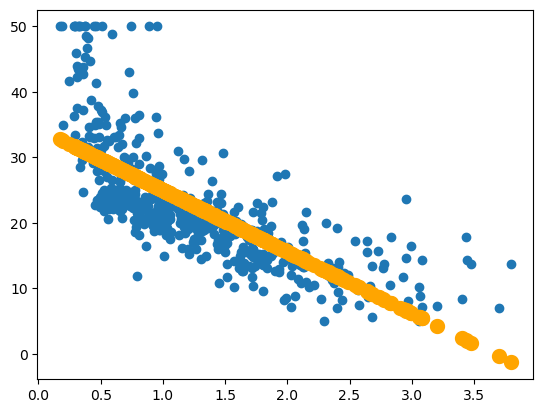

loss =  38.48858


In [135]:
from IPython.display import clear_output

for i in range(100):

    y_pred = w * x + b

    # Вычисляем функцию ошибок
    loss = torch.mean((y_pred - y)**2)

    # Вычисляем градиенты
    loss.backward()


    # Делаем шаг градиентного спуска по матрице весов
    w.data -= 0.05*w.grad.data
    b.data -= 0.05*b.grad.data

    # обнуляем градиенты
    w.grad.data.zero_()
    b.grad.data.zero_()



    # the rest of code is just bells and whistles
    if (i+1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break

Посмотрим градиенты на примере двухслойной сети

In [2]:
dtype = torch.float
device = torch.device("cuda:0")
# device = torch.device("cuda:0") # Раскомментируйте это, чтобы запустить на GPU

# N - размер батча; D_in - входной размер;
# H - размер скрытого слоя; D_out - размер вывода.
N, D_in, H, D_out = 64, 3, 3, 10
N, D_in, H, D_out = 64, 3, 3, 10

# Создание случайных тензоров для хранения входных и выходных данных.
# Настройка requires_grad = False указывает, что нам не нужно вычислять градиенты
# по отношению к этим тензорам во время обратного прохода.
x = torch.randn(N, D_in, dtype=dtype)
y = torch.randn(N, D_out, dtype=dtype)

# Создаем тензоры случайных весов.
# Настройка requires_grad = True указывает, что мы хотим вычислять градиенты с
# уважение к этим тензорам во время обратного прохода.

# Create random Tensors for weights.
# Установка requires_grad = True указывает, что мы хотим вычислить градиенты
# относительно этих тензоров во время обратного прохода.
w1 = torch.randn(D_in, H, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, dtype=dtype, requires_grad=True)

In [3]:
y_pred = (x @ w1).clamp(min=0).matmul(w2)
loss = (y_pred - y).pow(2).sum()

# вычисляем градиенты
loss.backward()

In [4]:
print((y_pred - y).pow(2).sum())

tensor(5564.8403, grad_fn=<SumBackward0>)


In [5]:
w1.grad, w2.grad

(tensor([[ -741.5760,  1839.5068,  2017.9591],
         [ -789.4653,  -115.7820,  -517.0090],
         [  209.6497,  -140.2833, -1849.6550]]),
 tensor([[ -62.9023,  279.2522,    8.3606,   40.0006,  -26.8105,  -38.2805,
            17.3170, -203.9612,  -50.4932,  -58.3414],
         [ -68.0929,   81.4579,  157.5467,  144.0973, -313.6410, -116.1861,
          -192.3916, -224.4374,    5.9012,  223.9198],
         [-204.5793,  519.5938,  753.9453,  296.1652, -782.1194, -186.8747,
          -351.8692, -590.8970, -100.0829,  937.5620]]))

In [6]:
loss.grad # нет доступа к нелистовым градиентам в дереве AD

/tmp/ipykernel_5474/1930231510.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /croot/pytorch_1686931851744/work/build/aten/src/ATen/core/TensorBody.h:486.)
  loss.grad # нет доступа к нелистовым градиентам в дереве AD


In [7]:
# заставляем переменную запоминать градиенты фнукции потерь
y_pred = (x @ w1).clamp(min=0).matmul(w2)
y_pred.retain_grad()

loss = (y_pred - y).pow(2).sum()
loss.retain_grad()

loss.backward()

In [8]:
loss.grad

tensor(1.)

In [9]:
x.grad # не требует градиента

In [10]:
y.grad # не требует градиента

**Замечание:** Градиенты помещаются в поле `.grad` тензоров, на которых они вычисляются.

In [11]:
w1

tensor([[-0.5022,  1.0793,  1.6377],
        [-1.1625, -0.2945, -0.8346],
        [ 0.4396,  0.6272, -1.4559]], requires_grad=True)

In [12]:
with torch.no_grad():

    pass

## Дополнительные материалы

*1). Official PyTorch tutorials: https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py*

*2). arXiv article about the deep learning frameworks comparison: https://arxiv.org/pdf/1511.06435.pdf*

*3). Useful repo with different tutorials: https://github.com/yunjey/pytorch-tutorial*

*4). Facebook AI Research (main contributor of PyTorch) website: https://facebook.ai/developers/tools*